Initial Data Preview:
   Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999             I

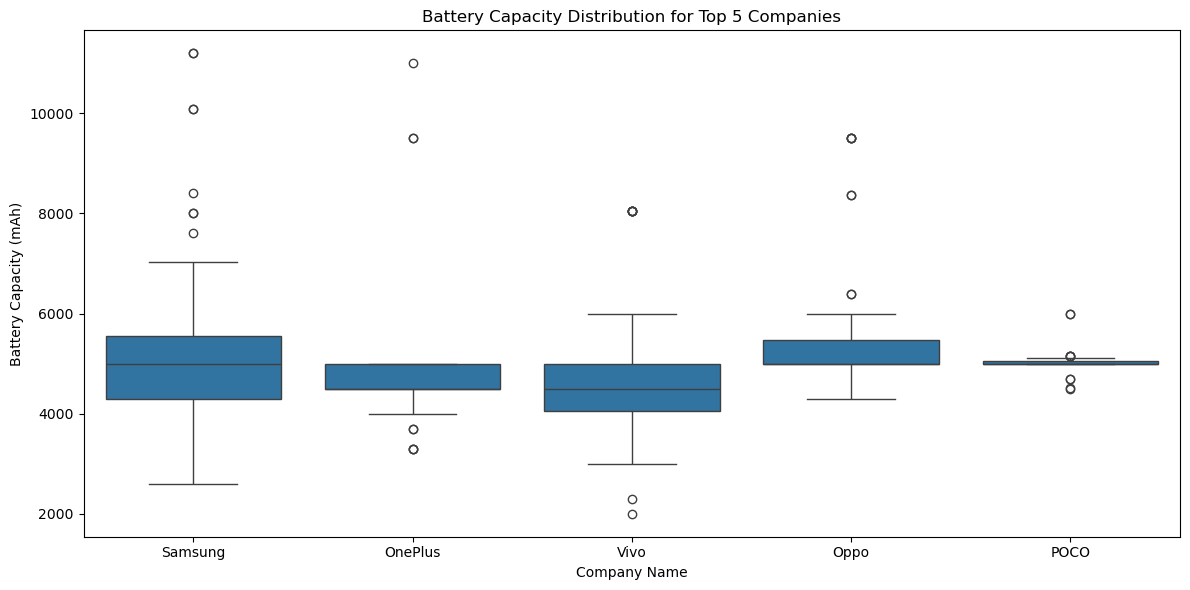

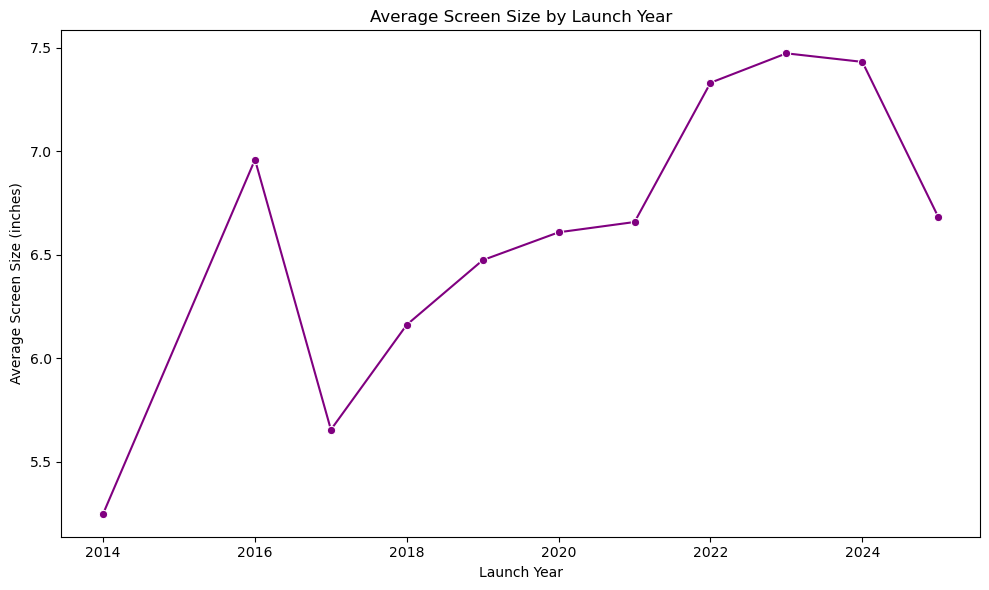

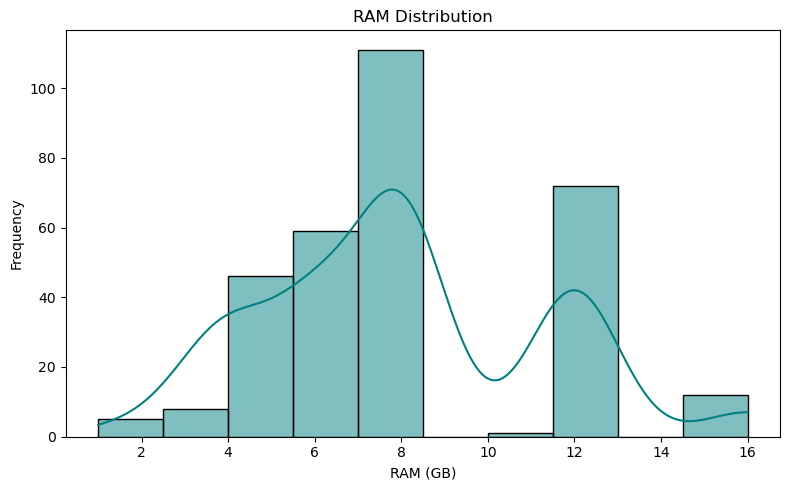

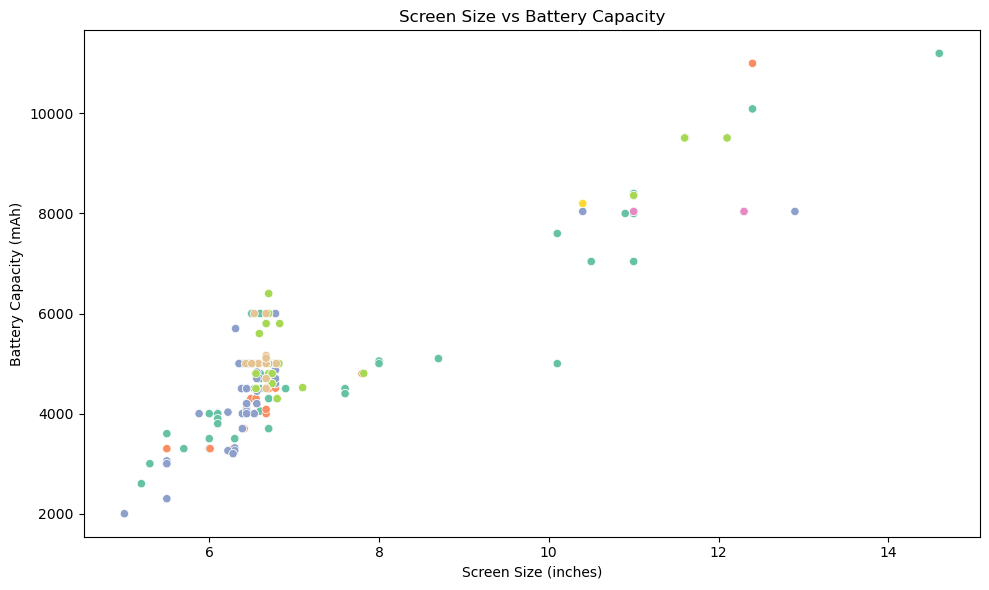

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "D:\\Mobile Dataset app\\Mobiles Dataset (2025).csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preview
print("Initial Data Preview:\n", df.head())
print("\nColumns:\n", df.columns)

# Step 1: Clean currency and symbols
currency_symbols = {
    'PKR': '', 'INR': '', 'CNY': '', 'USD': '', 'AED': '',
    '₹': '', '¥': '', '$': '', 'د.إ': '', ',': '', 'Not available': np.nan
}

price_columns = [
    'Launched Price (Pakistan)', 'Launched Price (India)',
    'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)'
]

for col in price_columns:
    df[col] = df[col].replace(currency_symbols, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 2: Clean other numeric columns
def clean_numeric_column(col, remove_str):
    return pd.to_numeric(
        df[col].str.replace(remove_str, '', regex=False).replace('Not available', np.nan),
        errors='coerce'
    )

df['Mobile Weight'] = clean_numeric_column('Mobile Weight', 'g')
df['Battery Capacity'] = clean_numeric_column('Battery Capacity', 'mAh')
df['Screen Size'] = clean_numeric_column('Screen Size', 'inches')
df['RAM'] = clean_numeric_column('RAM', 'GB')

# Drop rows with missing essential numeric values
df.dropna(subset=price_columns + ['Mobile Weight', 'Battery Capacity', 'Screen Size', 'RAM'], inplace=True)

# Step 3: Print cleaned info
print("\nCleaned Data Info:\n")
print(df.info())

# Step 4: Visualizations
#1.Battery Capacity Distribution for Top 5 Companies
plt.figure(figsize=(12, 6))
top_5_companies = df['Company Name'].value_counts().head(5).index
sns.boxplot(
    data=df[df['Company Name'].isin(top_5_companies)],
    x='Company Name', y='Battery Capacity'
)
plt.title('Battery Capacity Distribution for Top 5 Companies')
plt.ylabel('Battery Capacity (mAh)')
plt.xlabel('Company Name')
plt.tight_layout()
plt.show()

#2.Average Screen Size by Launch Year
plt.figure(figsize=(10, 6))
yearly_screen_size = df.groupby('Launched Year')['Screen Size'].mean().reset_index()
sns.lineplot(data=yearly_screen_size, x='Launched Year', y='Screen Size', marker='o', color='purple')
plt.title('Average Screen Size by Launch Year')
plt.ylabel('Average Screen Size (inches)')
plt.xlabel('Launch Year')
plt.tight_layout()
plt.show()

# 3. RAM Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['RAM'], bins=10, kde=True, color="teal")
plt.title('RAM Distribution')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Screen Size vs Battery Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Screen Size', y='Battery Capacity', hue='Company Name', palette='Set2', legend=False)
plt.title('Screen Size vs Battery Capacity')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Battery Capacity (mAh)')
plt.tight_layout()
plt.show()
